In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PowerTransformer
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots

In [2]:
house = pd.read_csv(r"C:\Users\DYNABOOK\Downloads\housing.csv")
house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Descriptive statistics for all numerical attributes

In [4]:
house.drop(['latitude', 'longitude'], axis=1).describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
house.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
house['total_bedrooms'] = house['total_bedrooms'].fillna(house['total_bedrooms'].median())

In [7]:
house.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Finding Correlation for all numeric variables

In [8]:
correlation_matrix = house.drop(['latitude', 'longitude'], axis=1).corr(numeric_only=True)

fig = px.imshow(correlation_matrix,
                 text_auto=True,         
                 color_continuous_scale='RdBu_r',  
                 labels=dict(color='Correlation')) 

fig.update_layout(
    title='Correlation Heatmap',
    xaxis_title='Features',
    yaxis_title='Features',
)

fig.show()

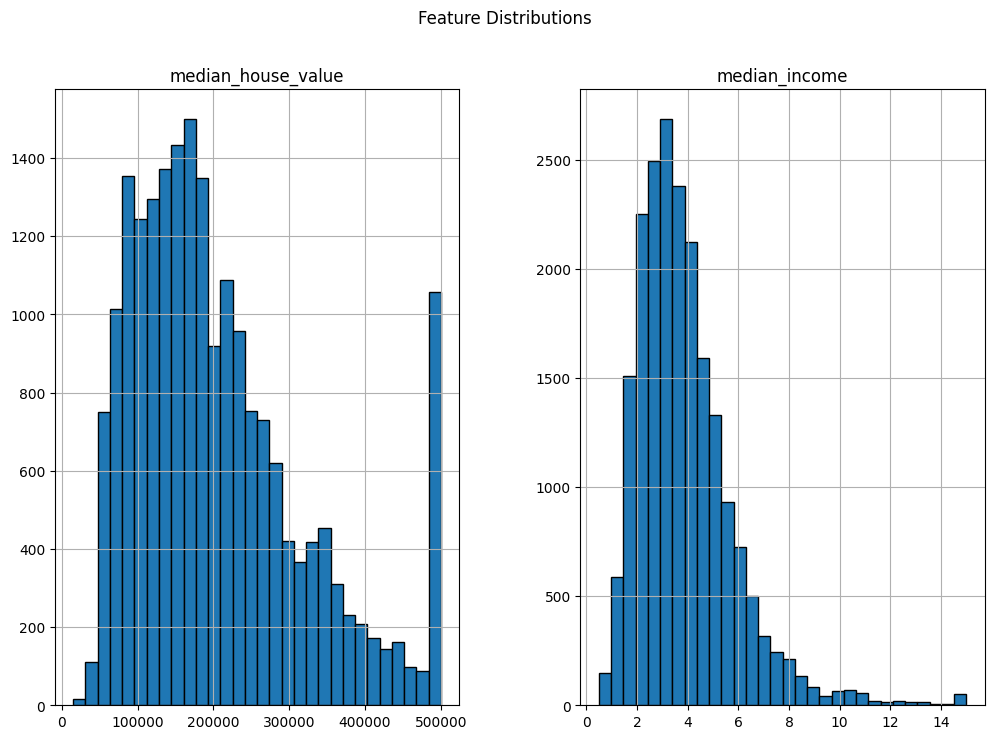

In [9]:
house[['median_house_value','median_income']].hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle('Feature Distributions')
plt.show()

In [10]:
fig = make_subplots(
    rows=2, cols=3, 
    subplot_titles=['Total Rooms', 'Total Bedrooms', 'Population', 
                    'Households', 'Median Income', 'Meadian House Value'] 
)
colors = ['#67001f', '#b2182b', '#d6604d', '#f4a582', '#fddbc7','#fddbc8']

features = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income','median_house_value']
for i, column in enumerate(features):
    fig.add_trace(
        go.Histogram(x=house[column], nbinsx=30, marker_color=colors[i]),
        row=(i // 3) + 1, col=(i % 3) + 1
    )
fig.update_layout(
    title_text='Feature Distributions',
    height=500, width=800,
    showlegend=False,
    plot_bgcolor='white'
)

fig.show()

In [11]:
fig = px.bar(house['ocean_proximity'].value_counts().reset_index(),
             x='ocean_proximity', y='count',
             title='Ocean Proximity Distribution',
             labels={'index': 'Ocean Proximity', 'ocean_proximity': 'Count'},color='ocean_proximity', 
             color_discrete_sequence=['#2166ac', '#4393c3', '#92c5de', '#d1e5f0'])
fig.show()

In [12]:
for i, column in enumerate(['total_rooms', 'total_bedrooms', 'population', 'median_income','median_house_value']):
    fig = px.box(house, y=column, 
                 title=f'Box Plot for {column}', 
                 color_discrete_sequence=[colors[i]])
    fig.show()

In [13]:
house['room_per_household'] = house['total_rooms']/house['households']
house['bedrooms_by_household'] = house['total_bedrooms']/house['households']
house['population_by_household'] = house['population']/house['households']
house['room_density'] = house['total_rooms']/house['population']


In [14]:
house['income_to_price'] = house['median_income']/house['median_house_value']

In [15]:
data = pd.DataFrame({
    'ocean_proximity': ['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND']
})
encoder_1 = OneHotEncoder(drop='first', sparse_output=False)
encoded_data_1 = encoder_1.fit_transform(data[['ocean_proximity']])


encoded_ocean_proximity_1 = pd.DataFrame(encoded_data_1, columns=encoder_1.get_feature_names_out(['ocean_proximity']))

house = pd.concat([house, encoded_ocean_proximity_1], axis=1)
house


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,room_per_household,bedrooms_by_household,population_by_household,room_density,income_to_price,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810,2.555556,2.732919,0.000018,0.0,0.0,0.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880,2.109842,2.956685,0.000023,1.0,0.0,0.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446,2.802260,2.957661,0.000021,0.0,0.0,0.0,1.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059,2.547945,2.283154,0.000017,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081,2.181467,2.879646,0.000011,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,1.133333,2.560606,1.970414,0.000020,NaN,NaN,NaN,NaN
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,1.315789,3.122807,1.957865,0.000033,NaN,NaN,NaN,NaN
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,1.120092,2.325635,2.238332,0.000018,NaN,NaN,NaN,NaN
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,1.171920,2.123209,2.510121,0.000022,NaN,NaN,NaN,NaN


In [18]:
house = pd.get_dummies(house, columns=["ocean_proximity"], drop_first=True)

In [16]:
house.drop(['ocean_proximity_INLAND','ocean_proximity_ISLAND','ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN','ocean_proximity_INLAND','ocean_proximity_ISLAND','ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN'],axis=1,inplace=True)


In [71]:
house.drop(['total_rooms','total_bedrooms','population','households'],axis=1,inplace=True)

In [21]:
num_features = ["room_per_household", "bedrooms_by_household", "population_by_household", "room_density"]
pt = PowerTransformer(method="yeo-johnson")  
house[num_features] = pt.fit_transform(house[num_features])


In [22]:
fig = make_subplots(
    rows=2, cols=3, 
    subplot_titles=["room_per_household", "bedrooms_by_household", "population_by_household", "room_density"] 
)
colors = ['#67001f', '#b2182b', '#d6604d', '#f4a582']

features = ["room_per_household", "bedrooms_by_household", "population_by_household", "room_density"]
for i, column in enumerate(features):
    fig.add_trace(
        go.Histogram(x=house[column], nbinsx=30, marker_color=colors[i]),
        row=(i // 3) + 1, col=(i % 3) + 1
    )
fig.update_layout(
    title_text='Feature Distributions',
    height=500, width=800,
    showlegend=False,
    plot_bgcolor='white'
)

fig.show()

In [24]:
X = house.drop('median_house_value', axis=1)  
y = house['median_house_value']              

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)
print(f"Linear Regression Performance:")
print("RSME",np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R square",r2_score(y_test, y_pred_lr))


Linear Regression Performance:
RSME 51854.50691561299
R square 0.7948052911640657


In [31]:
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)
print(f"Decision Tree regressor Performance:")
print("RSME",np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print("R square",r2_score(y_test, y_pred_rf))

Decision Tree regressor Performance:
RSME 8381.062763575757
R square 0.9982677095310548


In [ ]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
print(f"Random Forest Regressor Performance:")
print("RSME",np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R square",r2_score(y_test, y_pred_rf))

Random Forest Regressor Performance:
RSME 4764.461127375156
R square 0.9982677095310548
